In [1]:
import numpy as np
from hipposlam.utils import read_pickle
from hipposlam.sequences import Sequences
from hipposlam.comput_utils import MLM
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
import matplotlib as mpl
from matplotlib import cm
from tqdm import tqdm


In [2]:


project_tag = 'Avoidance'
data_dir = join('data', project_tag)
plot_dir = join('plots', project_tag, 'ratemaps')
os.makedirs(plot_dir, exist_ok=True)
trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
metadata['seqR'] = 5 # For now. Remove this line next time after seqR is stored in the metadata
metadata['seqL'] = 10 # For now. Remove this line next time after seqL is stored in the metadata
seqR = metadata['seqR']
seqL = metadata['seqL']
fkey2id_dict = metadata['stored_f']
id2fkey_dict = {val:key for key, val in fkey2id_dict.items()}

f_pos = metadata['fpos']


trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
trajdf['a'] = trajdf['rota'] * trajdf['rotz']
print('Max x row ', trajdf['X_Nrow'].max())
trajdf



Max x row  196


,t,x,y,z,rotx,roty,rotz,rota,objID,objID_dist,f_sigma,X,X_Nrow,a
0,128,4.680020,2.807367,0.061624,-1.579231e-03,-0.001579,-0.999998,1.570826,[],[],{},[],0,-1.570822
1,256,4.678977,2.754858,0.058151,-1.903525e-03,-0.001798,-0.999997,1.580309,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [1], '5543_1': [1], '15573_2': [1],...","[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.580304
2,384,4.678577,2.701075,0.058773,-7.499675e-04,-0.000738,-0.999999,1.594632,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [2], '5543_1': [2], '15573_2': [2],...","[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.594631
3,512,4.678619,2.646312,0.059026,-3.263218e-04,-0.000293,-1.000000,1.613886,"[2640, 2717, 5543, 15573, 17158]","[2640_2, 2717_1, 5543_1, 15573_2, 17158_1]","{'2640_2': [3], '5543_1': [3], '15573_2': [3],...","[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...",6,-1.613886
4,640,4.677918,2.591286,0.059130,-1.425992e-04,-0.000069,-1.000000,1.635931,"[1632, 1856, 2640, 2717, 5543, 15573, 17158]","[1632_2, 1856_2, 2640_2, 2717_1, 5543_1, 15573...","{'2640_2': [4], '5543_1': [4], '15573_2': [4],...","[[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [...",8,-1.635931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,1968384,4.108388,-0.634866,0.059201,-2.580587e-04,0.000066,-1.000000,-0.396684,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.396684
15339,1968512,4.156990,-0.614649,0.059201,-2.533233e-04,0.000073,-1.000000,-0.403152,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.403152
15340,1968640,4.205974,-0.593832,0.059201,-1.015182e-04,0.000090,-1.000000,-0.398917,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.398917
15341,1968768,4.256237,-0.573071,0.059201,5.461929e-07,0.000191,-1.000000,-0.393958,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.393958


In [3]:
from scipy.ndimage import gaussian_filter
from hipposlam.comput_utils import divide_ignore, midedges



class BayesianDecoder:
    def __init__(self, xmin, xmax, ymin, ymax, amin, amax, dp, da, bodysd):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.amin = amin
        self.amax = amax
        self.dp = dp
        self.da = da
        self.bodysd = bodysd
        self.bodysd_ind = self.bodysd/self.dp
        self.xedges = np.arange(xmin, xmax+dp, dp)
        self.yedges = np.arange(ymin, ymax+dp, dp)
        self.aedges = np.arange(-np.pi, np.pi+da, da)
        self.xedm = midedges(self.xedges)
        self.yedm = midedges(self.yedges)
        self.aedm = midedges(self.aedges)

    def compute_histogram(self, x, y, a):
        data3d = np.stack([x, y, a]).T  # (T, 3)
        H3d, edges3d = np.histogramdd(data3d, bins=[self.xedges, self.yedges, self.aedges])
        return H3d, edges3d

    def compute_spikecounts(self, xsp, ysp):
        H2d, _, _ = np.histogram2d(xsp, ysp, bins=(self.xedges, self.yedges))
        H2d_smooth = gaussian_filter(H2d, sigma=self.bodysd_ind, mode='constant', cval=0)
        return H2d, H2d_smooth

    def compute_directional_occupancy(self, a):
        Ha, _ = np.histogram(a, bins=self.aedges)
        return Ha

    def compute_directional_spikecounts(self, asp):
        Hasp, _ = np.histogram(asp, bins=self.aedges)
        return Hasp

    def compute_ratemap(self, occ, spcounts):
        return divide_ignore(spcounts, occ)



In [5]:
trajdf['x'][[1, 2, 3]]

[4.678977157001073, 4.678577116232086, 4.678619415958693]

-6.1 6.6 -2.5 4.7


<BarContainer object of 32 artists>

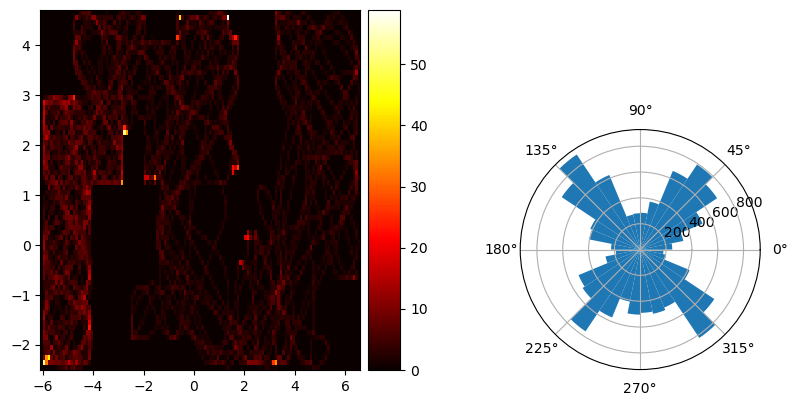

In [19]:
# Compute occpancy
bodysd = 0.15  # body length of the robot = 0.3m
dp = 0.1
da = 2*np.pi/32
xmin = np.floor(trajdf['x'].min() * 10) / 10
xmax = np.ceil(trajdf['x'].max() * 10) / 10
ymin = np.floor(trajdf['y'].min() * 10) / 10
ymax = np.ceil(trajdf['y'].max() * 10) / 10

amin, amax = -np.pi, np.pi

print(xmin, xmax, ymin, ymax)

BD = BayesianDecoder(xmin, xmax, ymin, ymax, amin, amax, dp, da, bodysd)
occ, edges3d = BD.compute_histogram(trajdf['x'].to_numpy(), trajdf['y'].to_numpy(), trajdf['a'].to_numpy())

occ_p = occ.sum(axis=2)
occ_a = occ.sum(axis=0).sum(axis=0)
fig = plt.figure(figsize=(8, 4), facecolor='w')
ax1 = fig.add_axes([0, 0, 0.4, 0.9])
ax2 = fig.add_axes([0.6, 0, 0.3, 0.6], polar=True)
cbar_ax = fig.add_axes([0.41, 0, 0.04, 0.9])
im1 = ax1.pcolormesh(BD.xedges, BD.yedges, occ_p.T, cmap='hot')
cb = fig.colorbar(im1, cax=cbar_ax)
ax2.bar(BD.aedm, occ_a, width=da)





In [20]:
Num_Fnodes = trajdf['X_Nrow'].max()

xdict = dict()
ydict = dict()
adict = dict()
fposdict = dict()
for i in range(trajdf.shape[0]):

    Xmat = trajdf['X'][i]
    x = trajdf['x'][i]
    y = trajdf['y'][i]
    a = trajdf['a'][i]

    if Xmat.shape[0] < 1:
        continue
    fnode_ids, sigma_ids = Sequences.X2sigma(Xmat, seqR, sigma_state=False)

    for fnode_id, sigma_id in zip(fnode_ids, sigma_ids):
        nodekey = id2fkey_dict[fnode_id]
        ensem_key = '%s-%d'%(nodekey, sigma_id)

        fposdict[ensem_key] = f_pos[nodekey.split('_')[0]]

        if ensem_key in xdict:
            xdict[ensem_key].append(x)
            ydict[ensem_key].append(y)
            adict[ensem_key].append(a)

        else:
            xdict[ensem_key] = [x]
            ydict[ensem_key] = [y]
            adict[ensem_key] = [a]



In [29]:
plot_ratemap = True
plot_dir2 = join('plots', project_tag, 'ratemaps_checkgsmooth')
os.makedirs(plot_dir2, exist_ok=True)

num_ensem = len(xdict.keys())
id2ensemkey = [ensem_key for ensem_key in xdict.keys()]
ensemkey2id = dict()
for i, ensem_key in enumerate(id2ensemkey):
    ensemkey2id[ensem_key] = i

all_ratemaps = np.zeros((num_ensem, BD.xedm.shape[0], BD.yedm.shape[0]))

for i in tqdm(range(num_ensem)):
    if i >30:
        break
    ensem_key = id2ensemkey[i]
    xsp = xdict[ensem_key]
    ysp = ydict[ensem_key]
    asp = adict[ensem_key]

    spmap, spmap_gau = BD.compute_spikecounts(xsp, ysp)
    Hsp3d, _ = BD.compute_histogram(xsp, ysp, asp)
    ratemap_3d = BD.compute_ratemap(occ, Hsp3d)
    ratemap_3d_gau = gaussian_filter(ratemap_3d, sigma=BD.bodysd_ind, mode='constant', cval=0, axes=(0, 1))


    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    ax[0, 0].pcolormesh(BD.xedges, BD.yedges, ratemap_3d[:, :, 0].T, cmap='hot')
    ax[0, 1].pcolormesh(BD.xedges, BD.yedges, ratemap_3d[:, :, 1].T, cmap='hot')
    ax[1, 0].pcolormesh(BD.xedges, BD.yedges, ratemap_3d_gau[:, :, 0].T, cmap='hot')
    ax[1, 1].pcolormesh(BD.xedges, BD.yedges, ratemap_3d_gau[:, :, 1].T, cmap='hot')

    ax[0, 0].set_title(ensem_key)
    fig.tight_layout()
    fig.savefig(join(plot_dir2, '%d.png'%(i)), dpi=200)
    plt.close(fig)

  2%|▏         | 31/1960 [00:12<12:42,  2.53it/s]


In [54]:
from scipy.stats import vonmises

ratemap_3d_gau_pa = ratemap_3d_gau.reshape(-1, BD.aedm.shape[0]).T
Npbins = ratemap_3d_gau_pa.shape[1]
kappa = 1
aedms = np.stack([BD.aedm] * Npbins).T


out = np.zeros(ratemap_3d_gau_pa.shape)
for i in range(BD.aedm.shape[0]):
    out += vonmises.pdf(aedms, kappa, loc=BD.aedm[i], scale=1) * ratemap_3d_gau_pa[i, :] * da

# area = np.sum(out)
# print(out.shape)
# print(area)
# plt.plot(BD.aedm, out, marker='x')

In [ ]:
plot_ratemap = True
plot_dir2 = join('plots', project_tag, 'ratemaps_MLM')
os.makedirs(plot_dir2, exist_ok=True)

num_ensem = len(xdict.keys())
id2ensemkey = [ensem_key for ensem_key in xdict.keys()]
ensemkey2id = dict()
for i, ensem_key in enumerate(id2ensemkey):
    ensemkey2id[ensem_key] = i

all_ratemaps = np.zeros((num_ensem, BD.xedm.shape[0], BD.yedm.shape[0]))

for i in tqdm(range(num_ensem)):
    if i >30:
        break
    ensem_key = id2ensemkey[i]
    xsp = xdict[ensem_key]
    ysp = ydict[ensem_key]
    asp = adict[ensem_key]

    spmap, spmap_gau = BD.compute_spikecounts(xsp, ysp)
    Hsp3d, _ = BD.compute_histogram(xsp, ysp, asp)
    Hsp_p = Hsp3d.sum(axis=2)
    Hsp_a = Hsp3d.sum(axis=0).sum(axis=0)

    ratemap_p = BD.compute_ratemap(occ_p, Hsp_p)
    ratemap_p_gau = gaussian_filter(ratemap_p, sigma=BD.bodysd_ind, mode='constant', cval=0)
    ratemap_a = BD.compute_ratemap(occ_a, Hsp_a)


    fig = plt.figure(figsize=(12, 10), facecolor='w')

    # Position map normal, color bar
    ax1 = fig.add_axes([0.05, 0.55, 0.4, 0.4])
    cbar_ax1 = fig.add_axes([0.45, 0.55, 0.02, 0.4])
    im1 = ax1.pcolormesh(BD.xedges, BD.yedges, ratemap_p_gau.T, cmap='hot')
    ax1.quiver(xsp, ysp, np.cos(asp), np.sin(asp), facecolor='b', alpha=0.5)
    ax1.scatter(fposdict[ensem_key][0], fposdict[ensem_key][1], marker='o', color='g')
    ax1.set_title(ensem_key)
    cb1 = fig.colorbar(im1, cax=cbar_ax1)

    # Polar map normal
    ax2 = fig.add_axes([0.55, 0.55, 0.4, 0.4], polar=True)
    ax2.bar(BD.aedm, ratemap_a, width=da)



    for axeach in [ax1]:
        axeach.set_xlim(xmin, xmax)
        axeach.set_ylim(ymin, ymax)


    fig.savefig(join(plot_dir2, '%d.png'%(i)), dpi=200)
    plt.close(fig)

In [24]:
ratemap_a.shape

(32,)

  0%|          | 0/1960 [00:00<?, ?it/s]


TypeError: Dimensions of C (32, 72, 127) should be one smaller than X(128) and Y(73) while using shading='flat' see help(pcolormesh)

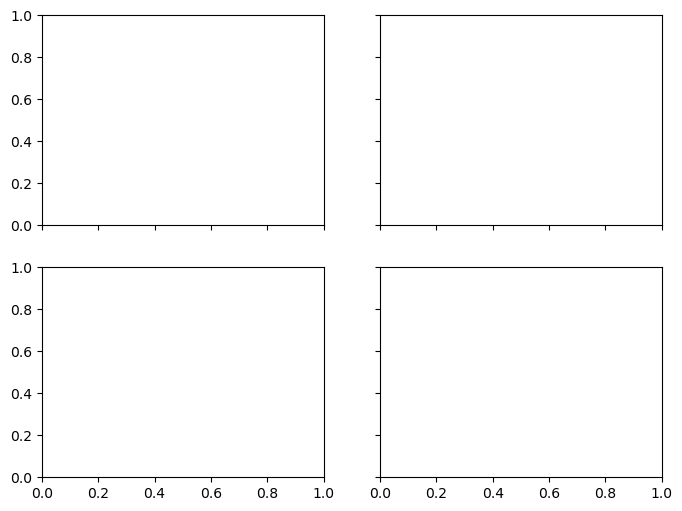

In [25]:

plot_ratemap = True
plot_dir2 = join('plots', project_tag, 'ratemaps2')
os.makedirs(plot_dir2, exist_ok=True)

num_ensem = len(xdict.keys())
id2ensemkey = [ensem_key for ensem_key in xdict.keys()]
ensemkey2id = dict()
for i, ensem_key in enumerate(id2ensemkey):
    ensemkey2id[ensem_key] = i

all_ratemaps = np.zeros((num_ensem, BD.xedm.shape[0], BD.yedm.shape[0]))

for i in tqdm(range(num_ensem)):
    if i >3:
        break
    ensem_key = id2ensemkey[i]
    xsp = xdict[ensem_key]
    ysp = ydict[ensem_key]
    asp = adict[ensem_key]

    spmap, spmap_gau = BD.compute_spikecounts(xsp, ysp)
    Hsp3d, _ = BD.compute_histogram(xsp, ysp, asp)
    Hsp_p = Hsp3d.sum(axis=2)
    Hsp_a = Hsp3d.sum(axis=0).sum(axis=0)

    ratemap_p = BD.compute_ratemap(occ_p, Hsp_p)
    ratemap_a = BD.compute_ratemap(occ_p, Hsp_p)


    ratemap_p = gaussian_filter(ratemap_p, sigma=BD.bodysd_ind, mode='constant', cval=0)

    all_ratemaps[i, :, :] = ratemap_p

    if plot_ratemap:
        fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True, facecolor='w')
        im0 = ax[0, 0].pcolormesh(BD.xedges, BD.yedges, occ.T)
        ax[0, 1].plot(trajdf['x'], trajdf['y'])
        im1 = ax[0, 1].scatter(xsp, ysp, color='r', marker='x', alpha=0.5, zorder=3)
        im2 = ax[1, 0].pcolormesh(BD.xedges, BD.yedges, spmap.T)
        ax[1, 0].plot(trajdf['x'], trajdf['y'], alpha=0.5, color='w')

        im3 = ax[1, 1].pcolormesh(BD.xedges, BD.yedges, ratemap.T)
        ax[1, 1].plot(trajdf['x'], trajdf['y'], alpha=0.5, color='w')
        plt.colorbar(im0, ax=ax[0, 0])
        plt.colorbar(im1, ax=ax[0, 1])
        plt.colorbar(im2, ax=ax[1, 0])
        plt.colorbar(im3, ax=ax[1, 1])
        fig.suptitle('%s'%(ensem_key))
        fig.tight_layout()
        fig.savefig(join(plot_dir, '%d.png'%(i)), dpi=200)
        plt.close(fig)





In [7]:
from scipy.special import factorial

def logPois(r, k, epsilon=1e-6):
    out = k * np.log(r+epsilon) - (r+epsilon) - factorial(k)
    return out

def PBern(p, k):
    return (p**k) * ((1-p) ** (1-k))

def logBern(p, k):
    out = k * np.log(p) + (1-k) * np.log(1-p)
    return out




In [13]:

xML = np.zeros(trajdf.shape[0])
yML = np.zeros(trajdf.shape[0])
np.random.seed(1)
subsampvec = np.random.permutation(num_ensem)

for i in tqdm(range(trajdf.shape[0])):
    f_sigma = trajdf['f_sigma'][i]
    idlist = []
    for nodekey, sigma_list in f_sigma.items():
        for sigma in sigma_list:
            ensem_key = '%s-%d'%(nodekey, sigma)
            ensem_id = ensemkey2id[ensem_key]
            idlist.append(ensem_id)

    act_vec = np.zeros(num_ensem)
    act_vec[idlist] = 1


    # all_ratemaps_epsilon = all_ratemaps + 1e-6
    # k_3d = act_vec.reshape(num_ensem, 1, 1)
    # logL_3d = k_3d * np.log(all_ratemaps_epsilon) - all_ratemaps_epsilon - factorial(k_3d)
    # logL = np.sum(logL_3d, axis=0)

    logL = np.zeros((BD.xedm.shape[0], BD.yedm.shape[0]))
    # for j in subsampvec[:200]:
    for j in range(num_ensem):
        ratemap = all_ratemaps[j]
        k = act_vec[j]
        ratemap_epsilon = ratemap + 1e-6
        out = k * np.log(ratemap_epsilon) - ratemap_epsilon - factorial(k)
        logL += out

    maxid1D_logL = np.argmax(logL)
    maxid2D_logL = np.unravel_index(maxid1D_logL, logL.shape)
    xML[i] = BD.xedm[maxid2D_logL[0]]
    yML[i] = BD.yedm[maxid2D_logL[1]]




100%|██████████| 15343/15343 [24:54<00:00, 10.27it/s]


0.13446254019992793


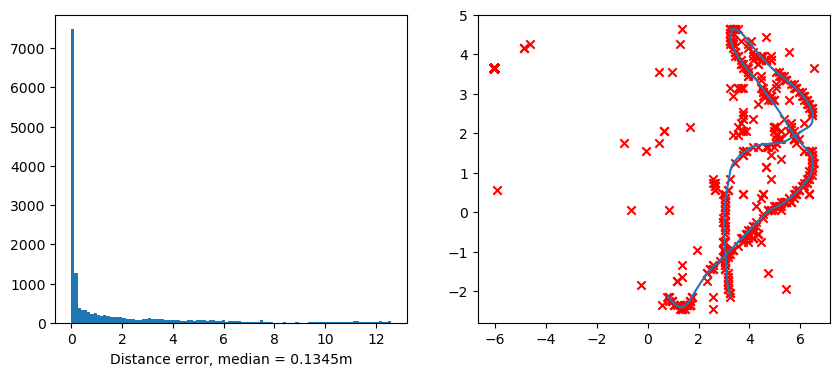

In [33]:
breakind=15342
xgt = trajdf['x'].to_numpy()[:breakind]
ygt = trajdf['y'].to_numpy()[:breakind]
xML = xML[:breakind]
yML = yML[:breakind]
mse = np.sqrt((xML - xgt)**2 + (yML - ygt)**2)
print(np.median(mse))
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(mse, bins=100)

breakind1 = 10000
ax[0].set_xlabel('Distance error, median = %0.4fm'  %np.median(mse))
ax[1].plot(xgt[breakind1:breakind1 + 500], ygt[breakind1:breakind1 + 500])
ax[1].scatter(xML[breakind1:breakind1 + 500], yML[breakind1:breakind1 + 500], color='r', marker='x')

In [3]:
inferdf = pd.read_pickle(join(data_dir, 'inferences.pickle'))


Text(0.5, 1.0, 'Mean = -0.1050 rad (-6.02 deg)')

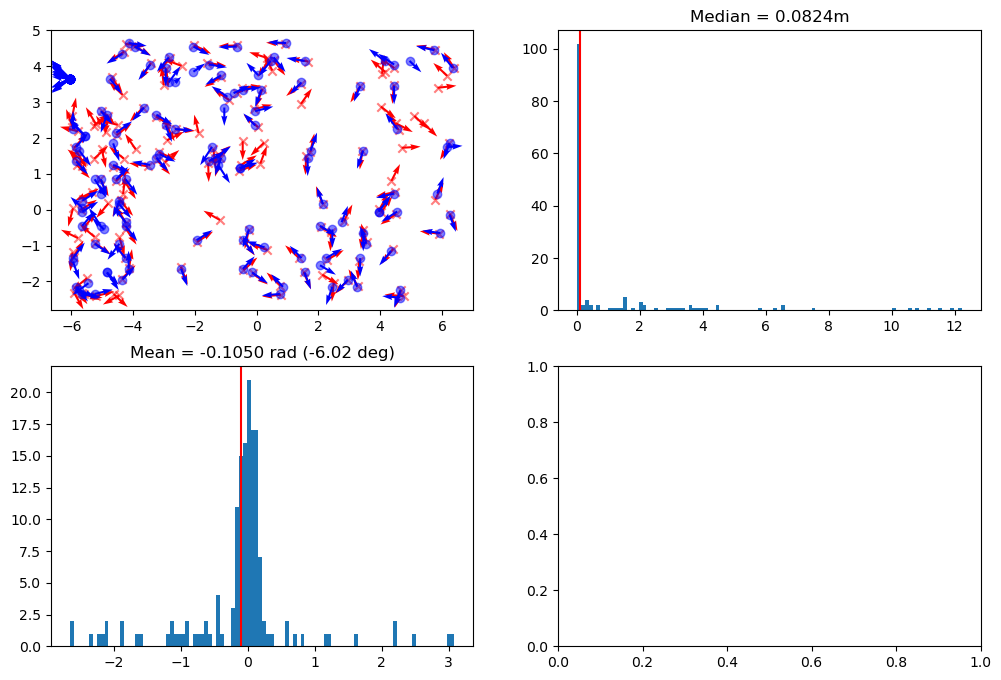

In [20]:
from pycircstat.descriptive import cdiff, mean as cmean
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].scatter(inferdf['xGT'], inferdf['yGT'], marker= 'x', color='r', alpha=0.5)
ax[0, 0].quiver(inferdf['xGT'], inferdf['yGT'], np.cos(inferdf['aGT']), np.sin(inferdf['aGT']), color='r')
ax[0, 0].scatter(inferdf['xML'], inferdf['yML'], marker= 'o', color='b', alpha=0.5)
ax[0, 0].quiver(inferdf['xML'], inferdf['yML'], np.cos(inferdf['aML']), np.sin(inferdf['aGT']), color='b')

RMSE_pos = np.sqrt((inferdf['xGT'] - inferdf['xML'])**2 + (inferdf['yGT'] - inferdf['yML'])**2)
mse = np.median(RMSE_pos)
ax[0, 1].hist(RMSE_pos, bins=100)
ax[0, 1].axvline(mse, color='r')
ax[0, 1].set_title('Median = %0.4fm'%mse)


adiff = cdiff(inferdf['aGT'], inferdf['aML'])
mean_adiff = cmean(adiff) - 2*np.pi
ax[1, 0].hist(adiff, bins=100)
ax[1, 0].axvline(mean_adiff, color='r')
ax[1, 0].set_title('Mean = %0.4f rad (%0.2f deg)'%(mean_adiff, np.rad2deg(mean_adiff)))

# Boundary Effect Investigation

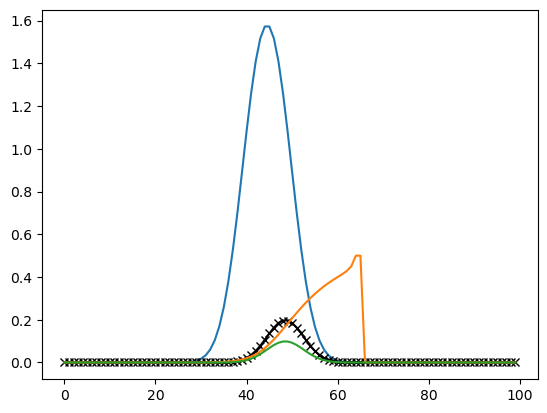

In [62]:
from scipy.ndimage import gaussian_filter1d


foox = np.zeros(100)
foox1 = foox.copy()
foox1[40:50] = 2
foox2 = foox.copy()
foox2[48:50] = 1
foox3 = divide_ignore(foox2, foox1)


foosd = 4

foo1 = gaussian_filter1d(foox1, sigma=foosd)
foo2 = gaussian_filter1d(foox2, sigma=foosd)
foo3 = divide_ignore(foo2, foo1)
plt.plot(foo1)
plt.plot(foo2, marker='x', color='k')
plt.plot(foo3)
plt.plot(gaussian_filter1d(foox3, sigma=foosd))


1.0


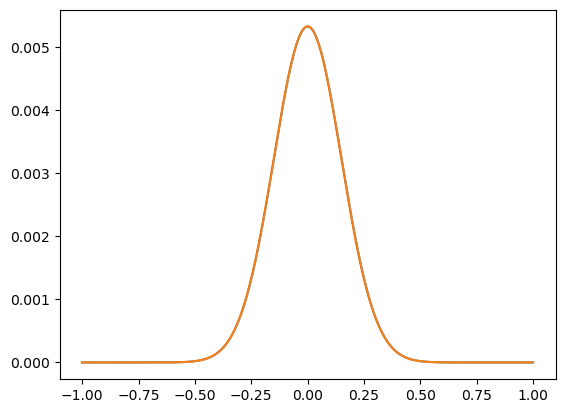

In [75]:

fiox = np.linspace(-1, 1, 1000)
fiodx = fiox[1]- fiox[0]

fiosd = 0.15
fioy = np.exp(np.square(fiox/fiosd) / -2) / (fiosd * np.sqrt(2*np.pi))
plt.plot(fiox, fioy * fiodx)


fiosd_ind = fiosd/fiodx
fiox_ind = np.zeros(fiox.shape[0])
fiox_ind[500] = 1
fioy_gau = gaussian_filter1d(fiox_ind, sigma=fiosd_ind)
plt.plot(fiox, fioy_gau)
print(fioy_gau.sum())


In [74]:
fiodx

0.002002002002001957